# Generate changepoints in time series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from badgers.generators.time_series.changepoints import RandomChangeInMeanGenerator

## Setup random generator

In [3]:
from numpy.random import default_rng
seed = 12345
rng = default_rng(seed)

## Generate data (gaussian white noise)

In [4]:
X = pd.DataFrame(data=rng.normal(size=(100,2), scale=0.25), columns=['dimension_0', 'dimension_1'], index=np.arange(100))

array([<Axes: >, <Axes: >], dtype=object)

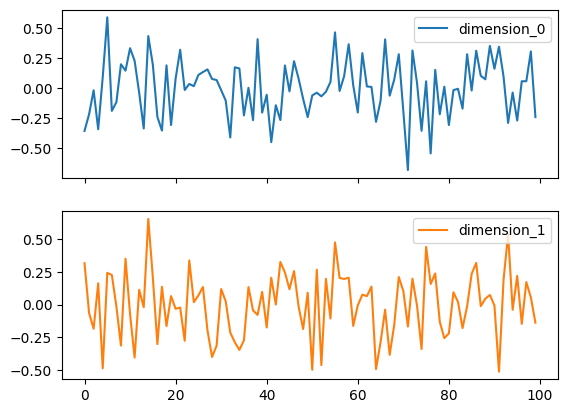

In [5]:
X.plot(subplots=True)

## Randomly generate changepoints

In [6]:
generator = RandomChangeInMeanGenerator(random_generator=rng)

In [7]:
Xt, _ = generator.generate(X=X.copy(), y=None, max_change=2, min_change=-2, n_changepoints=5)

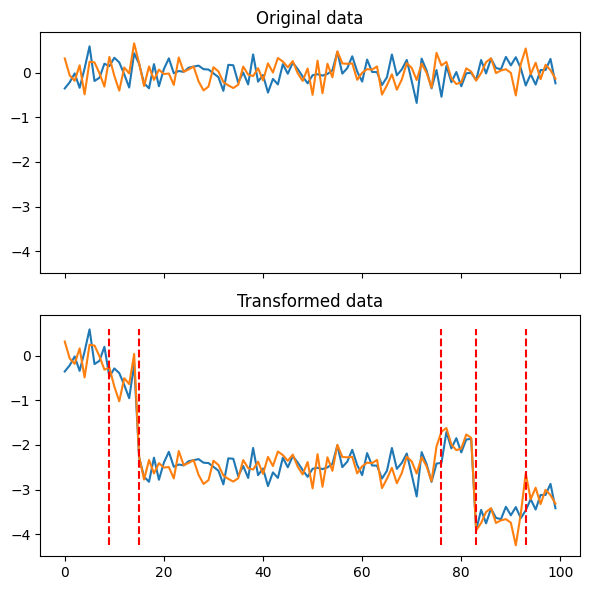

In [8]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(X)
axes[0].set_title('Original data')
axes[1].plot(Xt)
axes[1].set_title('Transformed data')
for cpt in generator.changepoints:
    axes[1].vlines(cpt[0], ymin=Xt.min().min(), ymax=Xt.max().max(), ls='--', color='r')
plt.tight_layout();